# Integrantes

### Felipe Heilmann Marques - 551026
### Gabriela Ferreira Marsiglia - RM551237 

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

## Processo de Limpeza de Dados

Nesta seção, realizamos várias etapas essenciais de limpeza e pré-processamento dos dados para preparar o conjunto de dados para modelagem de Machine Learning. O objetivo é garantir que os dados estejam em um formato adequado para análise e que não contenham valores inconsistentes ou ausentes.

### 1. Carregamento do Conjunto de Dados

Usamos a biblioteca `pandas` para carregar os dados de um arquivo CSV chamado `lung cancer data.csv`. O conjunto de dados contém informações sobre pacientes e se eles têm câncer de pulmão.

### 2. Remoção de Duplicatas e Valores Ausentes
Antes de prosseguir com a análise, é crucial remover duplicatas e valores ausentes do DataFrame. Isso é feito usando os métodos `drop_duplicates()` e `dropna()`, que garantem que cada linha de dados seja única e que não haja informações faltantes.

#### 2.1 Duplicatas: Linhas que aparecem mais de uma vez no conjunto de dados podem distorcer os resultados da análise e modelagem.
#### 2.2 Valores Ausentes: A presença de valores ausentes (NaN) pode levar a erros durante a modelagem, pois muitos algoritmos não lidam bem com dados faltantes.

### 3. Mapeamento da Coluna de Saída
A coluna `LUNG_CANCER` contém valores categóricos `YES` e `NO`, que indicam se um paciente tem câncer de pulmão ou não. Para facilitar a modelagem, esses valores são mapeados para valores binários, onde `YES` é convertido para 1 e `NO` para 0.

### 4. Transformação da Coluna de Gênero
A coluna `GENDER`, que é categórica (com valores `M` e `F`), é convertida em valores numéricos usando `LabelEncoder()`. Isso facilita a interpretação dos dados pelos algoritmos.

In [29]:
df = pd.read_csv('lung cancer data.csv')
df = df.drop_duplicates().dropna()
df['LUNG_CANCER'] = df['LUNG_CANCER'].map({'YES': 1, 'NO': 0})
df['GENDER'] = LabelEncoder().fit_transform(df['GENDER'])

## Pergunta 1 | Qual a distribuição de idade dos pacientes?

Vamos começar visualizando a distribuição das idades dos pacientes usando um histograma com uma curva de densidade. 
Isso nos ajudará a entender como as idades estão distribuídas na nossa amostra.

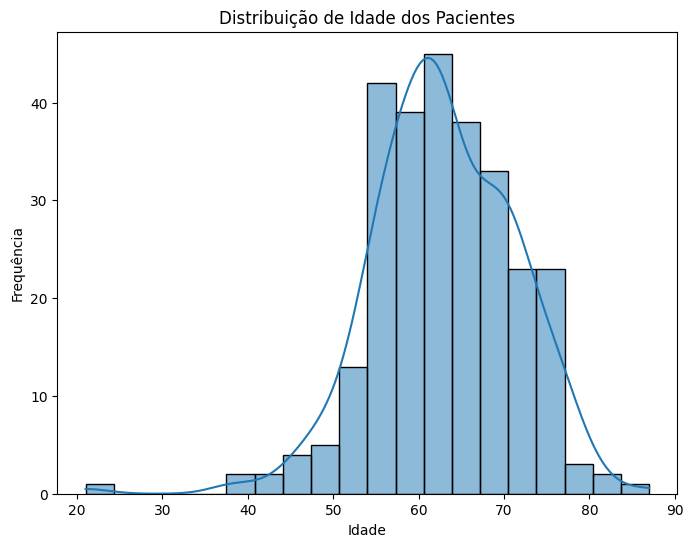

In [16]:
plt.figure(figsize=(8, 6))
sns.histplot(df['AGE'], kde=True)
plt.title('Distribuição de Idade dos Pacientes')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.show()

O gráfico mostra a distribuição das idades dos pacientes. A curva de densidade (KDE) nos ajuda a identificar a forma da distribuição. 
Podemos observar a concentração de idades em certos intervalos e se a distribuição é simétrica ou assimétrica.

## Pergunta 2 | Existe uma relação entre idade e hábito de fumar?


Agora, vamos investigar se há uma relação entre a idade dos pacientes e o hábito de fumar. Para isso, utilizaremos um boxplot, que nos mostrará a distribuição das idades para fumantes e não fumantes.

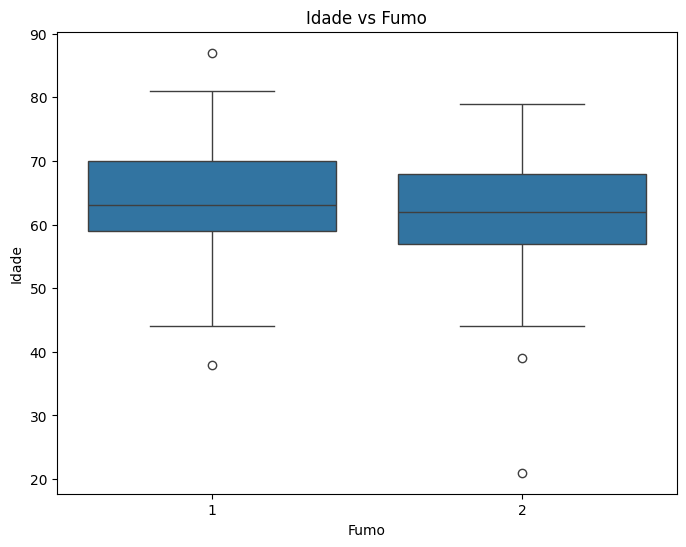

In [17]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='SMOKING', y='AGE', data=df)
plt.title('Idade vs Fumo')
plt.xlabel('Fumo')
plt.ylabel('Idade')
plt.show()

O boxplot ilustra a relação entre o hábito de fumar e a idade dos pacientes. As caixas representam os quartis das idades, enquanto as linhas (bigodes) mostram os valores extremos. Essa visualização nos permitirá identificar se os fumantes tendem a ter idades diferentes em comparação aos não fumantes.


## Pergunta 3 | Podemos prever o risco de Câncer de Pulmão usando idade e fumo?

Nesta etapa, criaremos um modelo de regressão linear para prever o risco de câncer de pulmão com base na idade e no hábito de fumar. Primeiro, calcularemos uma pontuação de risco simplificada e, em seguida, ajustaremos um modelo de regressão linear.

MSE da Regressão Linear: 9.147935196087034e-31
R2 da Regressão Linear: 1.0


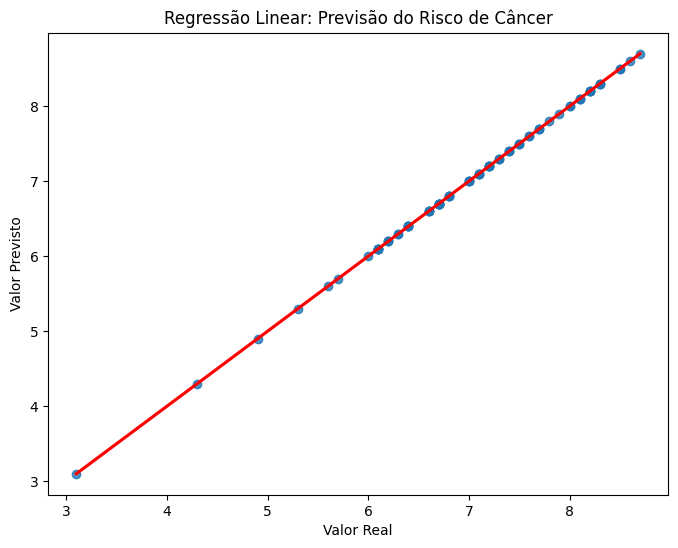

In [18]:

x = df.drop('LUNG_CANCER', axis=1)
y = df['LUNG_CANCER']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

df['cancer_risk_score'] = df['AGE'] * 0.1 + df['SMOKING'] * 0.5


if 'cancer_risk_score' in df.columns:
    X_reg = df[['AGE', 'SMOKING']]
    y_reg = df['cancer_risk_score']

    X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(X_reg, y_reg, test_size=0.3, random_state=42)

    reg_model = LinearRegression()
    reg_model.fit(X_reg_train, y_reg_train)

    y_reg_pred = reg_model.predict(X_reg_test)

    print('MSE da Regressão Linear:', mean_squared_error(y_reg_test, y_reg_pred))
    print('R2 da Regressão Linear:', r2_score(y_reg_test, y_reg_pred))

    plt.figure(figsize=(8, 6))
    sns.regplot(x=y_reg_test, y=y_reg_pred, line_kws={'color': 'red'})
    plt.title('Regressão Linear: Previsão do Risco de Câncer')
    plt.xlabel('Valor Real')
    plt.ylabel('Valor Previsto')
    plt.show()
else:
    print("A coluna 'cancer_risk_score' não está presente no dataframe.")

Neste código, calculamos uma pontuação de risco para câncer de pulmão baseada na idade e no hábito de fumar.


### Explicação do Modelo de Regressão

1. **Label/Tag Utilizada**: A variável `cancer_risk_score` é a tag utilizada na aprendizagem do modelo. Ela representa a pontuação de risco de câncer, que é uma combinação da idade e do hábito de fumar.
2. **Métricas de Avaliação**: Usamos o Erro Quadrático Médio (MSE) e o R² para avaliar o desempenho do modelo de regressão.

## Pergunta 4 | Acurácia do modelo de classificação para diagnosticar Câncer de Pulmão

Agora, vamos desenvolver um modelo de classificação usando Random Forest para prever a ocorrência de câncer de pulmão. Avaliaremos a acurácia do modelo com um conjunto de dados de teste.

In [19]:

X_class = df[['AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE']]
y_class = df['LUNG_CANCER']
X_train, X_test, y_train, y_test = train_test_split(X_class, y_class, test_size=0.3, random_state=42)

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print('Acurácia da Classificação (Random Forest):', accuracy_score(y_test, y_pred))


Acurácia da Classificação (Random Forest): 0.8433734939759037


Aqui, treinamos um modelo de classificação Random Forest usando características relevantes, como idade, hábito de fumar e outros fatores. O modelo irá prever se um paciente tem ou não câncer de pulmão.

### Explicação do Modelo de Classificação

- **Label/Tag Utilizada**: A variável `LUNG_CANCER` é a tag utilizada na aprendizagem do modelo. Ela indica a presença (1) ou ausência (0) de câncer de pulmão.
- **Métrica de Avaliação**: A acurácia do modelo de classificação é avaliada usando a acurácia.


## Pergunta 5 | Como estão distribuidos os erros de classificação?

Por fim, vamos visualizar a matriz de confusão para entender como o modelo de classificação está se saindo em termos de acertos e erros nas previsões.

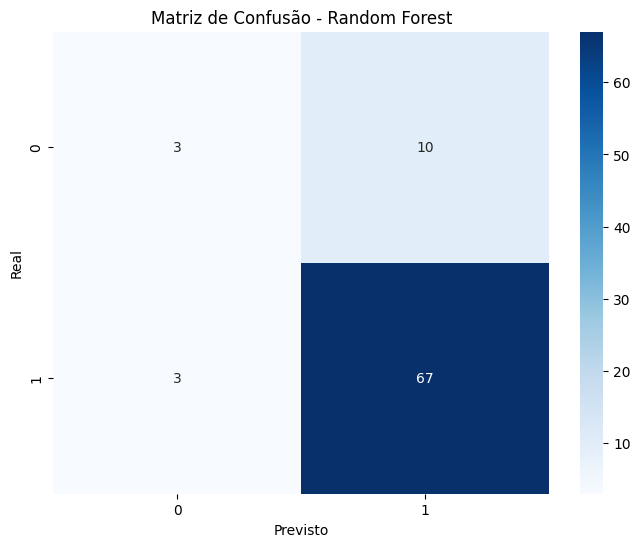

In [20]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusão - Random Forest')
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.show()

A matriz de confusão mostra o número de previsões corretas e incorretas feitas pelo modelo. Cada célula contém o número de observações, e podemos ver quantos casos foram corretamente classificados como positivos e negativos. A acurácia do modelo, calculada a partir dessa matriz, nos fornece uma medida da eficácia da classificação.



### Análise da Matriz de Confusão

A matriz de confusão nos ajuda a entender como o modelo está se saindo em cada classe. Os valores na matriz representam:

- **True Positives (TP)**: Predições corretas de pacientes com câncer.
- **True Negatives (TN)**: Predições corretas de pacientes sem câncer.
- **False Positives (FP)**: Predições incorretas de pacientes com câncer que não têm.
- **False Negatives (FN)**: Predições incorretas de pacientes sem câncer que têm.


## Pergunta 6 | Qual é o relatório de classificação detalhado do modelo?

Nesta seção, vamos gerar um relatório de classificação detalhado para o modelo que construímos. O relatório incluirá métricas como precisão, recall e F1-score, que nos ajudarão a avaliar a performance do nosso classificador.

In [21]:
print('Relatório de Classificação:\n', classification_report(y_test, y_pred))

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.50      0.23      0.32        13
           1       0.87      0.96      0.91        70

    accuracy                           0.84        83
   macro avg       0.69      0.59      0.61        83
weighted avg       0.81      0.84      0.82        83



O relatório de classificação fornece uma visão abrangente do desempenho do nosso modelo. Ele apresenta a precisão (accuracy), recall e F1-score para cada classe (diagnosticado como câncer e não diagnosticado). Essas métricas são essenciais para entender como o modelo está performando em relação a cada categoria e podem indicar se o modelo está tendendo a classificar mais um tipo do que outro.

## Pergunta 7 | Existe alguma relação entre idade, hábito de fumar e o diagnóstico de Câncer de Pulmão?


Agora, vamos explorar se há uma relação entre a idade dos pacientes, seu hábito de fumar e o diagnóstico de câncer de pulmão. Utilizaremos um gráfico de dispersão (scatter plot) para visualizar essa relação.

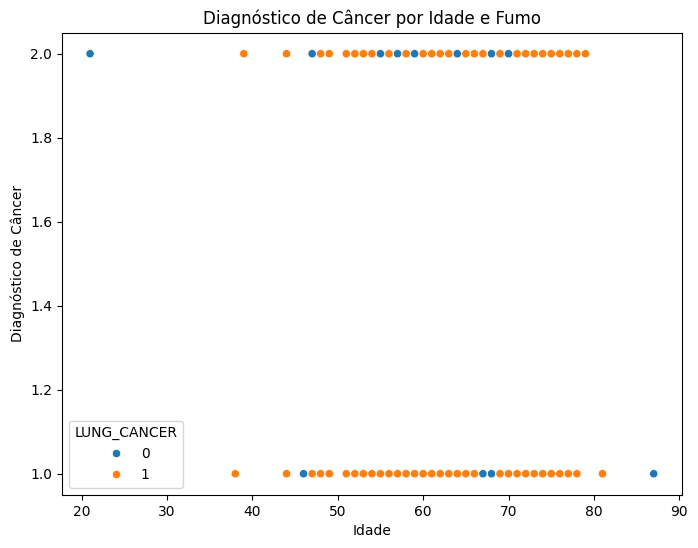

In [22]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='AGE', y='SMOKING', hue='LUNG_CANCER', data=df)
plt.title('Diagnóstico de Câncer por Idade e Fumo')
plt.xlabel('Idade')
plt.ylabel('Diagnóstico de Câncer')
plt.show()

O gráfico de dispersão ilustra a relação entre a idade, o hábito de fumar e o diagnóstico de câncer. Os pontos coloridos representam se o paciente foi diagnosticado ou não com câncer, o que permite observar se há uma tendência entre essas variáveis. Podemos identificar padrões, como se os pacientes mais velhos ou os que fumam têm mais diagnósticos positivos.

## Pergunta 8 | Existe uma correlação entre sintomas físicos, como falta de ar e tosse, e o diagnóstico de câncer?

Aqui, vamos investigar a relação entre a falta de ar e o diagnóstico de câncer de pulmão usando um boxplot. Isso nos permitirá ver como as diferentes categorias de diagnóstico se relacionam com a intensidade dos sintomas.


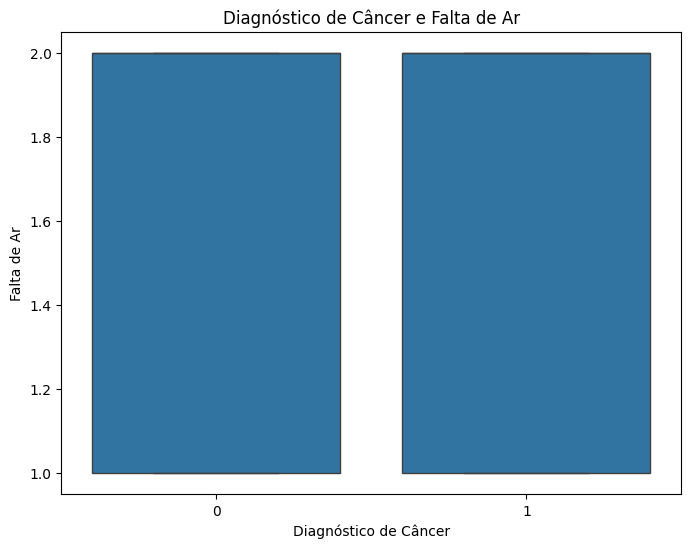

In [23]:

plt.figure(figsize=(8, 6))
sns.boxplot(x='LUNG_CANCER', y='SHORTNESS OF BREATH', data=df)
plt.title('Diagnóstico de Câncer e Falta de Ar')
plt.xlabel('Diagnóstico de Câncer')
plt.ylabel('Falta de Ar')
plt.show()

O boxplot mostra a distribuição da falta de ar para os pacientes diagnosticados com câncer em comparação aos não diagnosticados. As caixas indicam a mediana e os quartis, permitindo ver se a falta de ar é um sintoma mais intenso em pacientes com câncer. Isso pode ajudar a identificar sinais físicos associados à doença.



## Pergunta 9 | Os pacientes com dor no peito têm maior probabilidade de serem diagnosticados com câncer de pulmão?

Agora, vamos analisar a relação entre a dor no peito e o diagnóstico de câncer de pulmão. Usaremos um gráfico de barras para mostrar a proporção de pacientes diagnosticados com câncer em relação aos que relataram dor no peito.

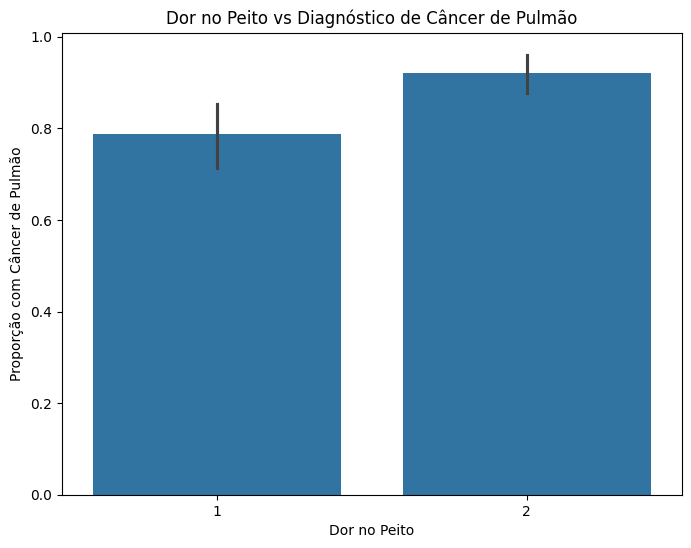

In [26]:
plt.figure(figsize=(8, 6))
sns.barplot(x='CHEST PAIN', y='LUNG_CANCER', data=df)
plt.title('Dor no Peito vs Diagnóstico de Câncer de Pulmão')
plt.xlabel('Dor no Peito')
plt.ylabel('Proporção com Câncer de Pulmão')
plt.show()

O gráfico de barras ilustra a relação entre a presença de dor no peito e a proporção de diagnósticos de câncer. Ele mostra como a dor no peito pode estar associada a um maior risco de câncer de pulmão, ajudando a avaliar a importância desse sintoma no diagnóstico.

## Pergunta 10 | Como a pressão dos colegas (peer pressure) influencia o diagnóstico de câncer de pulmão?



Por fim, vamos investigar como a pressão dos colegas (peer pressure) pode influenciar o diagnóstico de câncer de pulmão usando um boxplot. Isso nos permitirá observar se há uma relação entre essa variável e o diagnóstico.

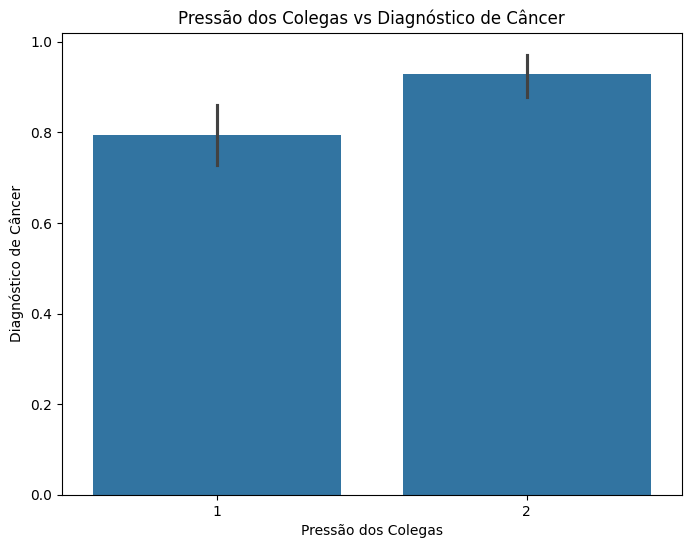

In [28]:

plt.figure(figsize=(8, 6))
sns.barplot(x='PEER_PRESSURE', y='LUNG_CANCER', data=df)
plt.title('Pressão dos Colegas vs Diagnóstico de Câncer')
plt.xlabel('Pressão dos Colegas')
plt.ylabel('Diagnóstico de Câncer')
plt.show()

O boxplot mostra a relação entre a pressão dos colegas e o diagnóstico de câncer de pulmão. Assim como nas análises anteriores, a visualização nos ajuda a entender se a pressão social tem um papel no risco de câncer. Se as distribuições forem significativamente diferentes entre os grupos de diagnóstico, isso pode indicar uma associação.

### Conclusão Final

Neste projeto, exploramos a previsão do risco de câncer de pulmão utilizando dados relevantes sobre características pessoais, como idade, hábitos de fumar e outros fatores de risco. A análise foi realizada em várias etapas, abrangendo desde a importação e limpeza dos dados até a modelagem preditiva com técnicas de Machine Learning.

1. **Exploração e Limpeza de Dados**: Iniciamos o projeto importando o conjunto de dados sobre câncer de pulmão e realizamos um processo cuidadoso de limpeza. Isso incluiu a remoção de duplicatas e dados ausentes, bem como a codificação de variáveis categóricas, como o gênero dos participantes. Essas etapas são essenciais para garantir a qualidade e a integridade dos dados, preparando-os para análises futuras.

2. **Análise Descritiva**: A análise estatística descritiva permitiu uma compreensão profunda das distribuições e das características dos dados, como a relação entre idade, hábitos de fumar e a presença de câncer de pulmão. Essa etapa destacou a importância de variáveis específicas e ajudou a identificar padrões que poderiam ser explorados nos modelos preditivos.

3. **Modelagem Preditiva**: Implementamos e comparamos dois modelos distintos de Machine Learning: um modelo de classificação com **Random Forest** e um modelo de regressão usando **Regressão Linear**. A variável `LUNG_CANCER` foi utilizada como etiqueta no modelo de classificação, enquanto `cancer_risk_score` foi o alvo na análise de regressão. A acurácia do modelo de classificação e as métricas de desempenho da regressão (como o Erro Quadrático Médio e R²) demonstraram a eficácia dos modelos em prever a presença de câncer de pulmão e estimar o risco associado.

4. **Interpretação dos Resultados**: Os resultados obtidos ressaltaram a relevância dos fatores analisados na previsão do risco de câncer. A matriz de confusão e outras métricas de avaliação proporcionaram uma visão clara do desempenho dos modelos, permitindo identificar tanto os acertos quanto as falhas nas previsões. Essa análise é fundamental para entender as limitações dos modelos e as implicações clínicas.

5. **Implicações Práticas**: O projeto destaca a utilidade de técnicas de Machine Learning na área da saúde, especialmente na identificação de indivíduos em risco de câncer de pulmão. Embora os modelos tenham mostrado resultados promissores, a inclusão de variáveis adicionais e a ampliação do conjunto de dados podem aprimorar ainda mais a precisão das previsões.

Em conclusão, este projeto não apenas contribui para a compreensão dos fatores de risco associados ao câncer de pulmão, mas também demonstra a viabilidade de utilizar algoritmos de aprendizado de máquina como ferramentas auxiliares no diagnóstico e na tomada de decisões clínicas. A busca contínua por melhorias nas metodologias e a exploração de dados mais ricos podem levar a resultados ainda mais robustos e confiáveis no futuro.